<a href="https://colab.research.google.com/github/shahjan49/CODSOFT/blob/main/CODSOFT_task_1_Titanic_Survival_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder

Load Data and shows first 10 rows of data.

In [3]:
data=pd.read_csv("C:/Users/Harsha/Desktop/codesoft/archive (1)/Titanic-Dataset.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Drop Unnecessary values

In [4]:
data_new=data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
data_new.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


Calculates statistical values and rounds them to 3 decimal places.

In [5]:
data_new.describe().round(3)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,714.000,891.000,891.000,891.000
mean,0.384,2.309,29.699,0.523,0.382,32.204
std,0.487,0.836,14.526,1.103,0.806,49.693
min,0.000,1.000,0.420,0.000,0.000,0.000
25%,0.000,2.000,20.125,0.000,0.000,7.910
50%,0.000,3.000,28.000,0.000,0.000,14.454
75%,1.000,3.000,38.000,1.000,0.000,31.000
max,1.000,3.000,80.000,8.000,6.000,512.329


Mark null values as True and returns sum of number of True values in each column

In [6]:
data_new.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Handling Null Values and Pre Processing the dataset.

In [7]:
data_new['Age']=data_new['Age'].fillna(data_new['Age'].mean())
data_new['Fare']=data_new['Fare'].fillna(data_new['Fare'].mean())
data_new.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Data Visualization

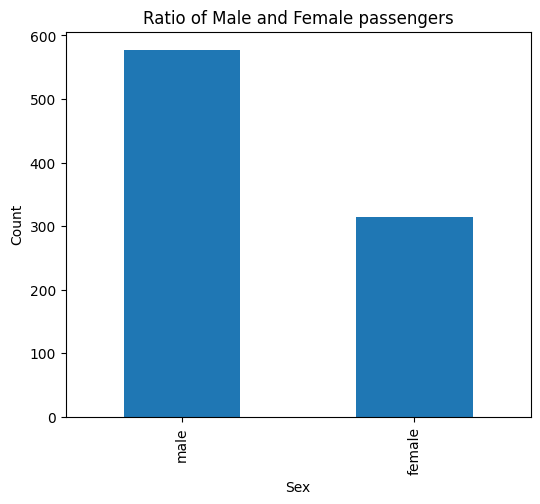

In [8]:
ax=data_new['Sex'].value_counts().plot(kind='bar',x = 'Survived',figsize=(6,5))    # creating coundplot
plt.title("Ratio of Male and Female passengers")
plt.ylabel("Count")
plt.xlabel("Sex")
plt.show()

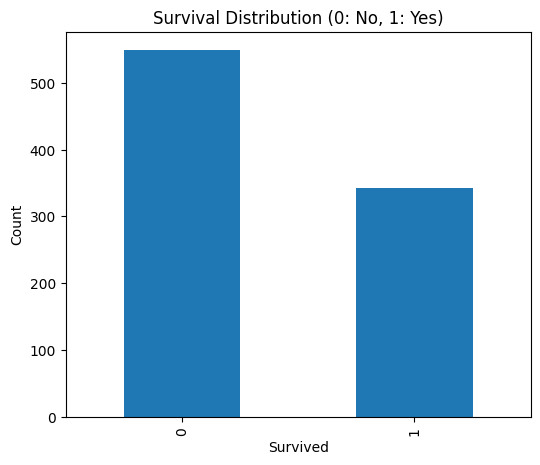

In [9]:
ax=data_new['Survived'].value_counts().plot(kind='bar',figsize=(6,5))    # creating coundplot
plt.title("Survival Distribution (0: No, 1: Yes)")
plt.ylabel("Count")
plt.xlabel("Survived")
plt.show()

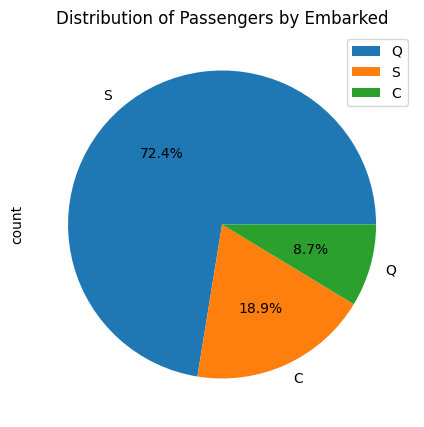

In [10]:
ax=data_new['Embarked'].value_counts().plot(kind='pie',figsize=(6,5),autopct='%1.1f%%')
plt.title("Distribution of Passengers by Embarked")
plt.legend(["Q", "S", "C"])
plt.show()

C:\Users\Harsha\AppData\Local\Temp\ipykernel_9728\2654295626.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Q", "S", "C"])


[]

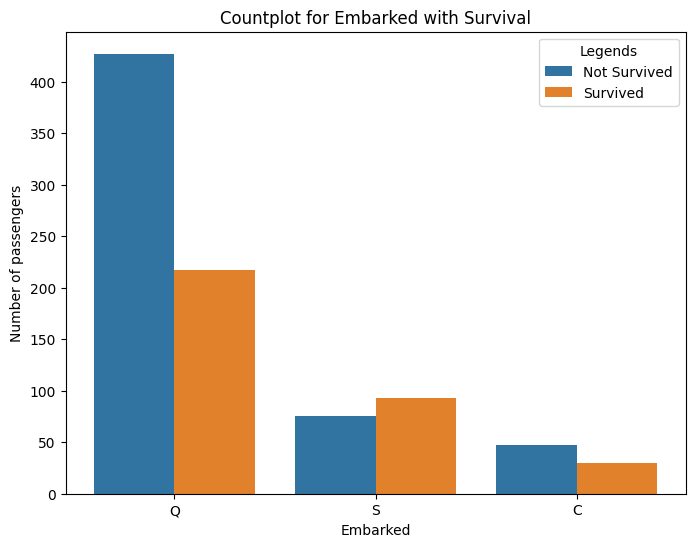

In [11]:
_, ax = plt.subplots(figsize = (8, 6))
snr.countplot(data = data_new, x = "Embarked", hue = "Survived", ax = ax)
ax.set_title("Countplot for Embarked with Survival")
ax.set_xlabel("Embarked")
ax.set_xticklabels(["Q", "S", "C"])
ax.set_ylabel("Number of passengers")
ax.legend(title = "Legends", labels = ["Not Survived", "Survived"])
plt.plot()

Change the catagorical data into numerical data by using OneHotEncoding.

In [12]:
data_new['Sex']=data_new['Sex'].apply({'male':1,'female':0}.get)
data_new['Embarked']=data_new['Embarked'].apply({'S':1,'Q':2,'C':3}.get)
data_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,3.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0


Deviding the data into Dependent and Independent variables.

In [13]:
x=data_new.drop(['Survived'],axis=1)
y=data_new['Survived']

Deviding the cleaned data into training and testing sets.

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

Creating first machine learning model 'k-nearest neighbour'.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

Train the model

In [16]:
x_train_clean = x_train.dropna()
y_train_clean = y_train[x_train.index.isin(x_train_clean.index)]


In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
x_train_imputed = imputer.fit_transform(x_train)


In [18]:
print(x_train_imputed.shape)
print(y_train_clean.shape)


(712, 7)
(710,)


In [19]:
# Assuming you've dropped rows from x_train based on NaN values:
x_train_imputed = x_train.dropna()  # Or however you handled NaNs
y_train_clean = y_train.loc[x_train_imputed.index]


In [20]:
knn.fit(x_train_imputed, y_train_clean)  # If you dropped rows, make sure y_train matches


KNeighborsClassifier()

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_test_imputed = imputer.fit_transform(x_test)


In [22]:
imputer.fit(x_train_imputed)  # Fit on training data
x_test_imputed = imputer.transform(x_test)  # Transform test data


In [23]:
predictions = knn.predict(x_test_imputed)
print(predictions)

[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0]


c:\Users\Harsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Make predictions on model

Check the Confusion metrix and Accuracy score.

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac=accuracy_score(y_test,predictions)
cm=confusion_matrix(y_test,predictions)

In [25]:
print(cm)

[[86 21]
 [31 41]]


In [26]:
print(ac)

0.7094972067039106


Creating Second Machine Learning Model 'Decision Tree'.

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [28]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
predictions=tree.predict(x_test)
print(predictions)

[0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1
 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1
 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0]


Check the Confusion metrix and Accuracy score.

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac=accuracy_score(y_test,predictions)
cm=confusion_matrix(y_test,predictions)

In [31]:
print(cm)

[[90 17]
 [22 50]]


In [32]:
print(ac)

0.7821229050279329


Creating third machine learning model 'Support Vector Machine'.

In [33]:
from sklearn.svm import SVC
svm=SVC()

In [34]:
svm.fit(x_train_imputed,y_train_clean)

SVC()

In [35]:
predictions=svm.predict(x_test)
print(predictions)

[0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0]


Check the Confusion metrix and Accuracy score.

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac=accuracy_score(y_test,predictions)
cm=confusion_matrix(y_test,predictions)

In [37]:
print(cm)

[[97 10]
 [56 16]]


In [38]:
print(ac)

0.6312849162011173
